### Reference(qiita)
### https://qiita.com/kotaroito/items/4eb29d42d7f8c534332f

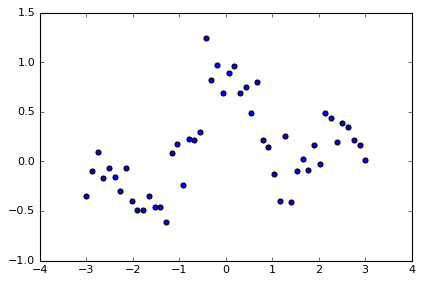

In [89]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

n = 50; N = 1000

x = np.linspace(-3, 3, n)
X = np.linspace(-3, 3, N)

pix = np.pi * x
y = np.sin(pix) / pix + 0.1 * x + 0.2 * np.random.randn(n)

x = x.reshape(-1, 1)
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x,y)

In [51]:
x

array([[-3.        ],
       [-2.87755102],
       [-2.75510204],
       [-2.63265306],
       [-2.51020408],
       [-2.3877551 ],
       [-2.26530612],
       [-2.14285714],
       [-2.02040816],
       [-1.89795918],
       [-1.7755102 ],
       [-1.65306122],
       [-1.53061224],
       [-1.40816327],
       [-1.28571429],
       [-1.16326531],
       [-1.04081633],
       [-0.91836735],
       [-0.79591837],
       [-0.67346939],
       [-0.55102041],
       [-0.42857143],
       [-0.30612245],
       [-0.18367347],
       [-0.06122449],
       [ 0.06122449],
       [ 0.18367347],
       [ 0.30612245],
       [ 0.42857143],
       [ 0.55102041],
       [ 0.67346939],
       [ 0.79591837],
       [ 0.91836735],
       [ 1.04081633],
       [ 1.16326531],
       [ 1.28571429],
       [ 1.40816327],
       [ 1.53061224],
       [ 1.65306122],
       [ 1.7755102 ],
       [ 1.89795918],
       [ 2.02040816],
       [ 2.14285714],
       [ 2.26530612],
       [ 2.3877551 ],
       [ 2

0.187291039288


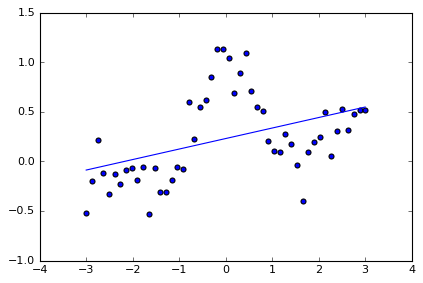

In [2]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x, y)

p = clf.predict(X)

plt.scatter(x, y)
plt.plot(X,p)

print(clf.score(x, y))

# Kernel Ridge

0.0630914429625


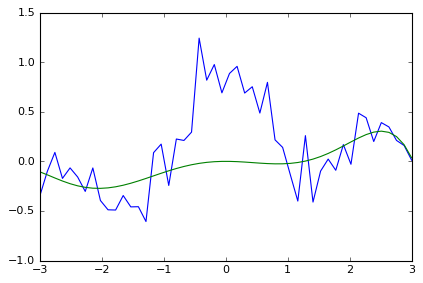

In [104]:
from sklearn.kernel_ridge import KernelRidge

#clf = KernelRidge(alpha=1, kernel='rbf')
#clf = KernelRidge(alpha=1, kernel='linear',gamma=0.1, degree=3, coef0=1)
clf = KernelRidge(alpha=1, kernel='poly',gamma=10, degree=6, coef0=0.1)
clf.fit(x, y)

#p = clf.predict(X)
p = clf.predict(x)

plt.plot(x, y)
#plt.plot(X, p)
plt.plot(x, p)

print(clf.score(x, y))

# RBF Kernel

0.936317062975


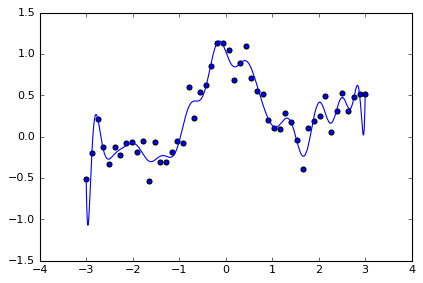

In [4]:
from sklearn.metrics.pairwise import rbf_kernel

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = LinearRegression()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

# L2 const.

0.848008654107


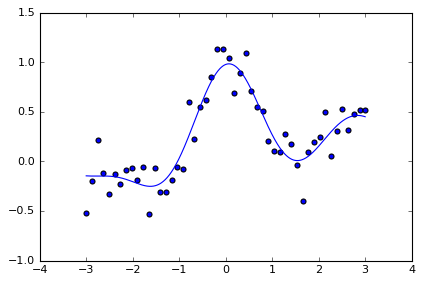

In [5]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Ridge()
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

# L1 const.

0.815910717049


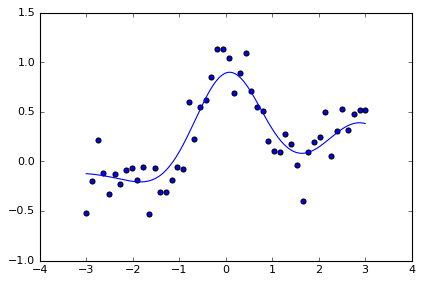

In [7]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = Lasso(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y)) # 0.820550922167

# Elastic-Net (L1+L2)

0.832362933699


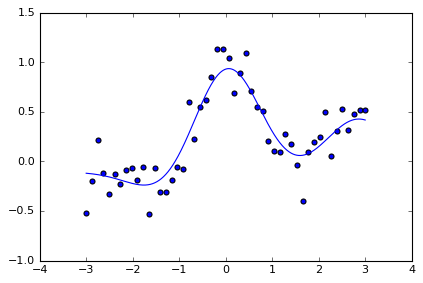

In [8]:
from sklearn.linear_model import ElasticNet

kx = rbf_kernel(x, x)
KX = rbf_kernel(X, x)

clf = ElasticNet(alpha=0.01)
clf.fit(kx, y)

p = clf.predict(KX)

plt.scatter(x, y)
plt.plot(X, p)

print(clf.score(kx, y))

## Lets try again 

In [105]:
# load text file
frame, x, y, a = [], [],[], []
for l in open('trajectory.txt').readlines():
    data = l[:-1].split(' ')
    frame += [int(data[0])]
    x += [float(data[1])]
    y += [float(data[2])]
    a += [float(data[3])]

# reshape
frame_ = np.array(frame).reshape(-1, 1)
x_ = np.array(x).reshape(-1, 1)
y_ = np.array(y).reshape(-1, 1)
a_ = np.array(a).reshape(-1, 1)


In [14]:
len(x)

339

0.962823801803


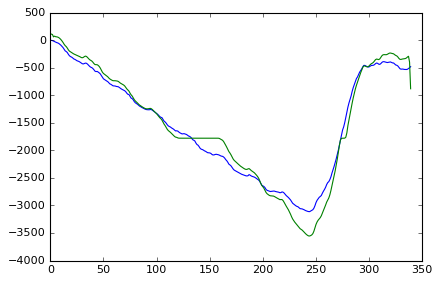

In [84]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

kx = rbf_kernel(frame_, frame_)

clf = Lasso(alpha=1, normalize =True, max_iter=100000, tol=100000)
#clf = Ridge()
#clf = ElasticNet(alpha=0.01)
#clf = KernelRidge(alpha=1.0, kernel='rbf')

clf.fit(kx, x_)
p = clf.predict(kx)

#plt.scatter(frame_, x_)
plt.plot(frame_, x_)
plt.plot(frame_, p)
#plt.plot(kx, p)

print(clf.score(kx, x)) # 0.820550922167

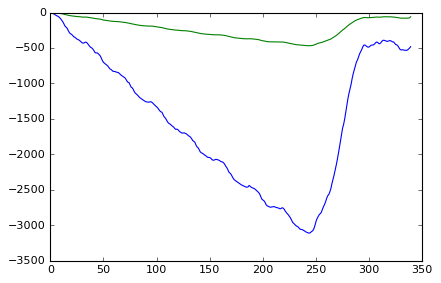

In [65]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=10, kernel='rbf')
clf.fit(frame_, x_)

p = clf.predict(frame_)

plt.plot(frame_, x_)
plt.plot(frame_, p)

#print(clf.score(x, y))

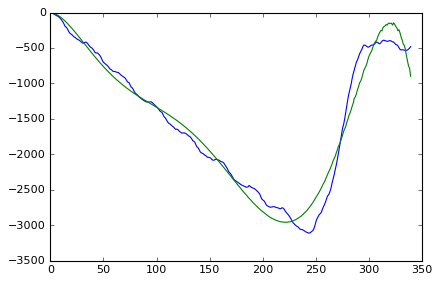

In [120]:
from sklearn.kernel_ridge import KernelRidge

#clf = KernelRidge(alpha=1, kernel='rbf')
#clf = KernelRidge(alpha=1, kernel='linear',gamma=0.1, degree=3, coef0=1)
clf = KernelRidge(alpha=1, kernel='poly',gamma=0.1, degree=6, coef0=10)
clf.fit(frame_, x_)

p = clf.predict(frame_)

plt.plot(frame_, x_)
plt.plot(frame_, p)


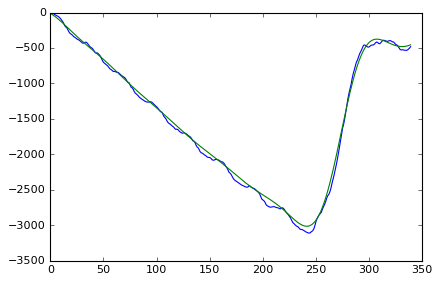

In [151]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=1, kernel='rbf',gamma=0.001, degree=10, coef0=10)
#clf = KernelRidge(alpha=1, kernel='linear',gamma=0.1, degree=3, coef0=1)
#clf = KernelRidge(alpha=1, kernel='poly',gamma=0.1, degree=6, coef0=10)
clf.fit(frame_, x_)

x2 = clf.predict(frame_)

plt.plot(frame_, x_)
plt.plot(frame_, p)

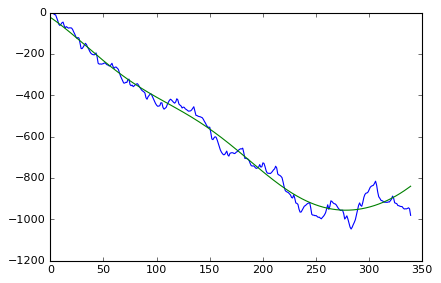

In [152]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=1, kernel='rbf',gamma=0.0001, degree=10, coef0=10)
#clf = KernelRidge(alpha=1, kernel='linear',gamma=0.1, degree=3, coef0=1)
#clf = KernelRidge(alpha=1, kernel='poly',gamma=0.1, degree=6, coef0=10)
clf.fit(frame_, y_)

y2 = clf.predict(frame_)

plt.plot(frame_, y_)
plt.plot(frame_, y2)

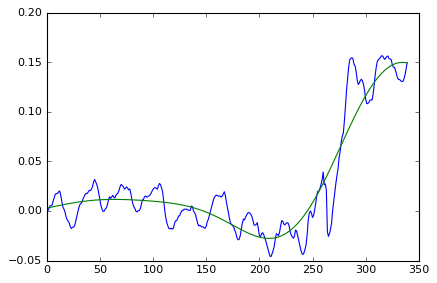

In [153]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=1, kernel='rbf',gamma=0.0001, degree=10, coef0=10)
#clf = KernelRidge(alpha=1, kernel='linear',gamma=0.1, degree=3, coef0=1)
#clf = KernelRidge(alpha=1, kernel='poly',gamma=0.1, degree=6, coef0=10)
clf.fit(frame_, a_)

a2 = clf.predict(frame_)

plt.plot(frame_, a_)
plt.plot(frame_, a2)

In [168]:
# write text file
outfp = open('traj_krr.txt', 'w')
for id in frame:
#        outfp.write(str(id) + ' ' + str(x2[id-1]) + ' ' + str(y2[id-1]) + ' ' + str(a2[id-1]) + '\n')
        outfp.write(str(id) + ' ' + str(x2[id-1][0]) + ' ' + str(y2[id-1][0]) + ' ' + str(a2[id-1][0]) + '\n')
outfp.close()

In [167]:
x2[1]

array([-29.43576626])

## Poly

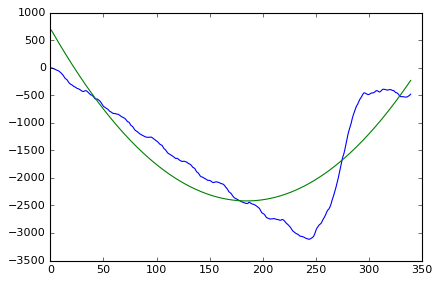

In [130]:
#　フィッティング
a1, a2, b = np.polyfit(np.array(frame),np.array(x), 2)    
# フィッティング曲線
x2 = a1 * np.array(frame)**2 + a2 * np.array(frame) + b

plt.plot(frame, x)
plt.plot(frame, x2)

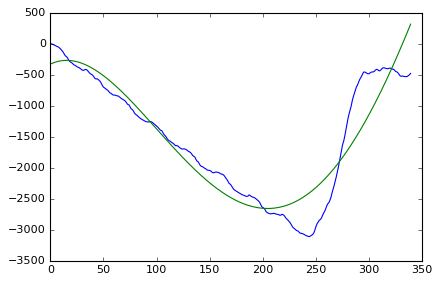

In [43]:
#　フィッティング
a00, a0, a1, a2, b = np.polyfit(np.array(frame),np.array(x), 4)
# フィッティング曲線
x2 = a00 *np.array(frame)**4 + a0 *np.array(frame)**3 + a1 * np.array(frame)**2 + a2 * np.array(frame) + b

plt.plot(frame, x)
plt.plot(frame, x2)

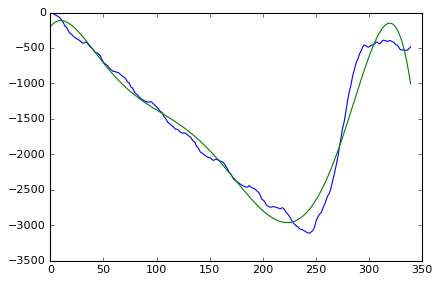

In [85]:
from sklearn.preprocessing import PolynomialFeatures


#poly = PolynomialFeatures(degree=10)
#　フィッティング
a6, a5, a4, a3, a2, a1, b = np.polyfit(np.array(frame),np.array(x), 6)
# フィッティング曲線
x2 = a6 *np.array(frame)**6 + a5 *np.array(frame)**5 + a4 *np.array(frame)**4 + a3 *np.array(frame)**3 + a2 * np.array(frame)**2 + a1 * np.array(frame) + b

plt.plot(frame, x)
plt.plot(frame, x2)

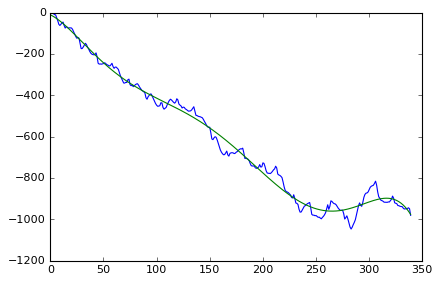

In [86]:
from sklearn.preprocessing import PolynomialFeatures


#poly = PolynomialFeatures(degree=10)
#　フィッティング
a6, a5, a4, a3, a2, a1, b = np.polyfit(np.array(frame),np.array(y), 6)
# フィッティング曲線
y2 = a6 *np.array(frame)**6 + a5 *np.array(frame)**5 + a4 *np.array(frame)**4 + a3 *np.array(frame)**3 + a2 * np.array(frame)**2 + a1 * np.array(frame) + b

plt.plot(frame, y)
plt.plot(frame, y2)

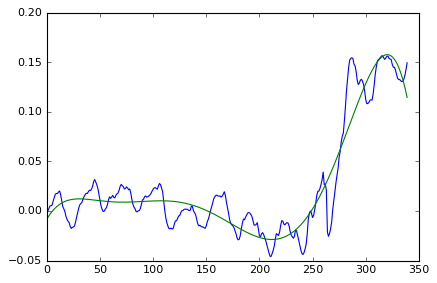

In [87]:
from sklearn.preprocessing import PolynomialFeatures


#poly = PolynomialFeatures(degree=10)
#　フィッティング
a6, a5, a4, a3, a2, a1, b = np.polyfit(np.array(frame),np.array(a), 6)
# フィッティング曲線
a2 = a6 *np.array(frame)**6 + a5 *np.array(frame)**5 + a4 *np.array(frame)**4 + a3 *np.array(frame)**3 + a2 * np.array(frame)**2 + a1 * np.array(frame) + b

plt.plot(frame, a)
plt.plot(frame, a2)

In [88]:
# write text file
outfp = open('traj_opt.txt', 'w')
for id in frame:
        outfp.write(str(id) + ' ' + str(x2[id-1]) + ' ' + str(y2[id-1]) + ' ' + str(a2[id-1]) + '\n')
outfp.close()

In [15]:
# write text file
outfp = open('traj.txt', 'w')
for id in frame:
        outfp.write(str(id) + ' ' + str(x[id-1]) + ' ' + str(y[id-1]) + ' ' + str(a[id-1]) + '\n')
outfp.close()